In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data = pd.read_csv('Crop_recommendation.csv')
data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [31]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
data.drop(columns=['Unnamed: 8', 'Unnamed: 9'], axis=1, inplace=True)

C:\Users\Ксения\AppData\Local\Temp\ipykernel_14344\1753525105.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

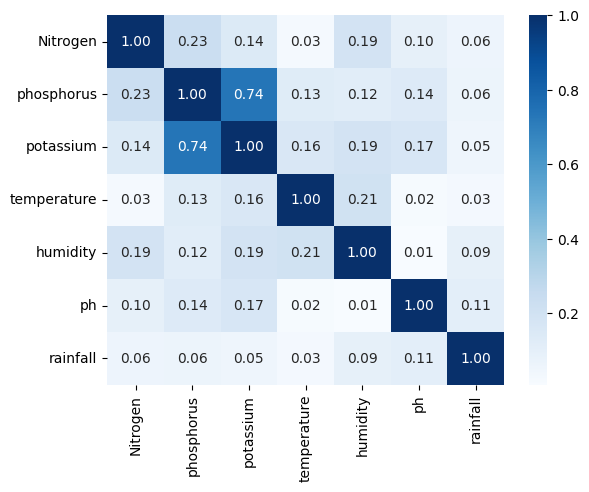

In [8]:
corr = data.corr()
sns.heatmap(abs(corr), cmap = 'Blues', fmt='.2f', annot=True)

In [9]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
data.isnull().sum()

Nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Figure size 1500x600 with 0 Axes>

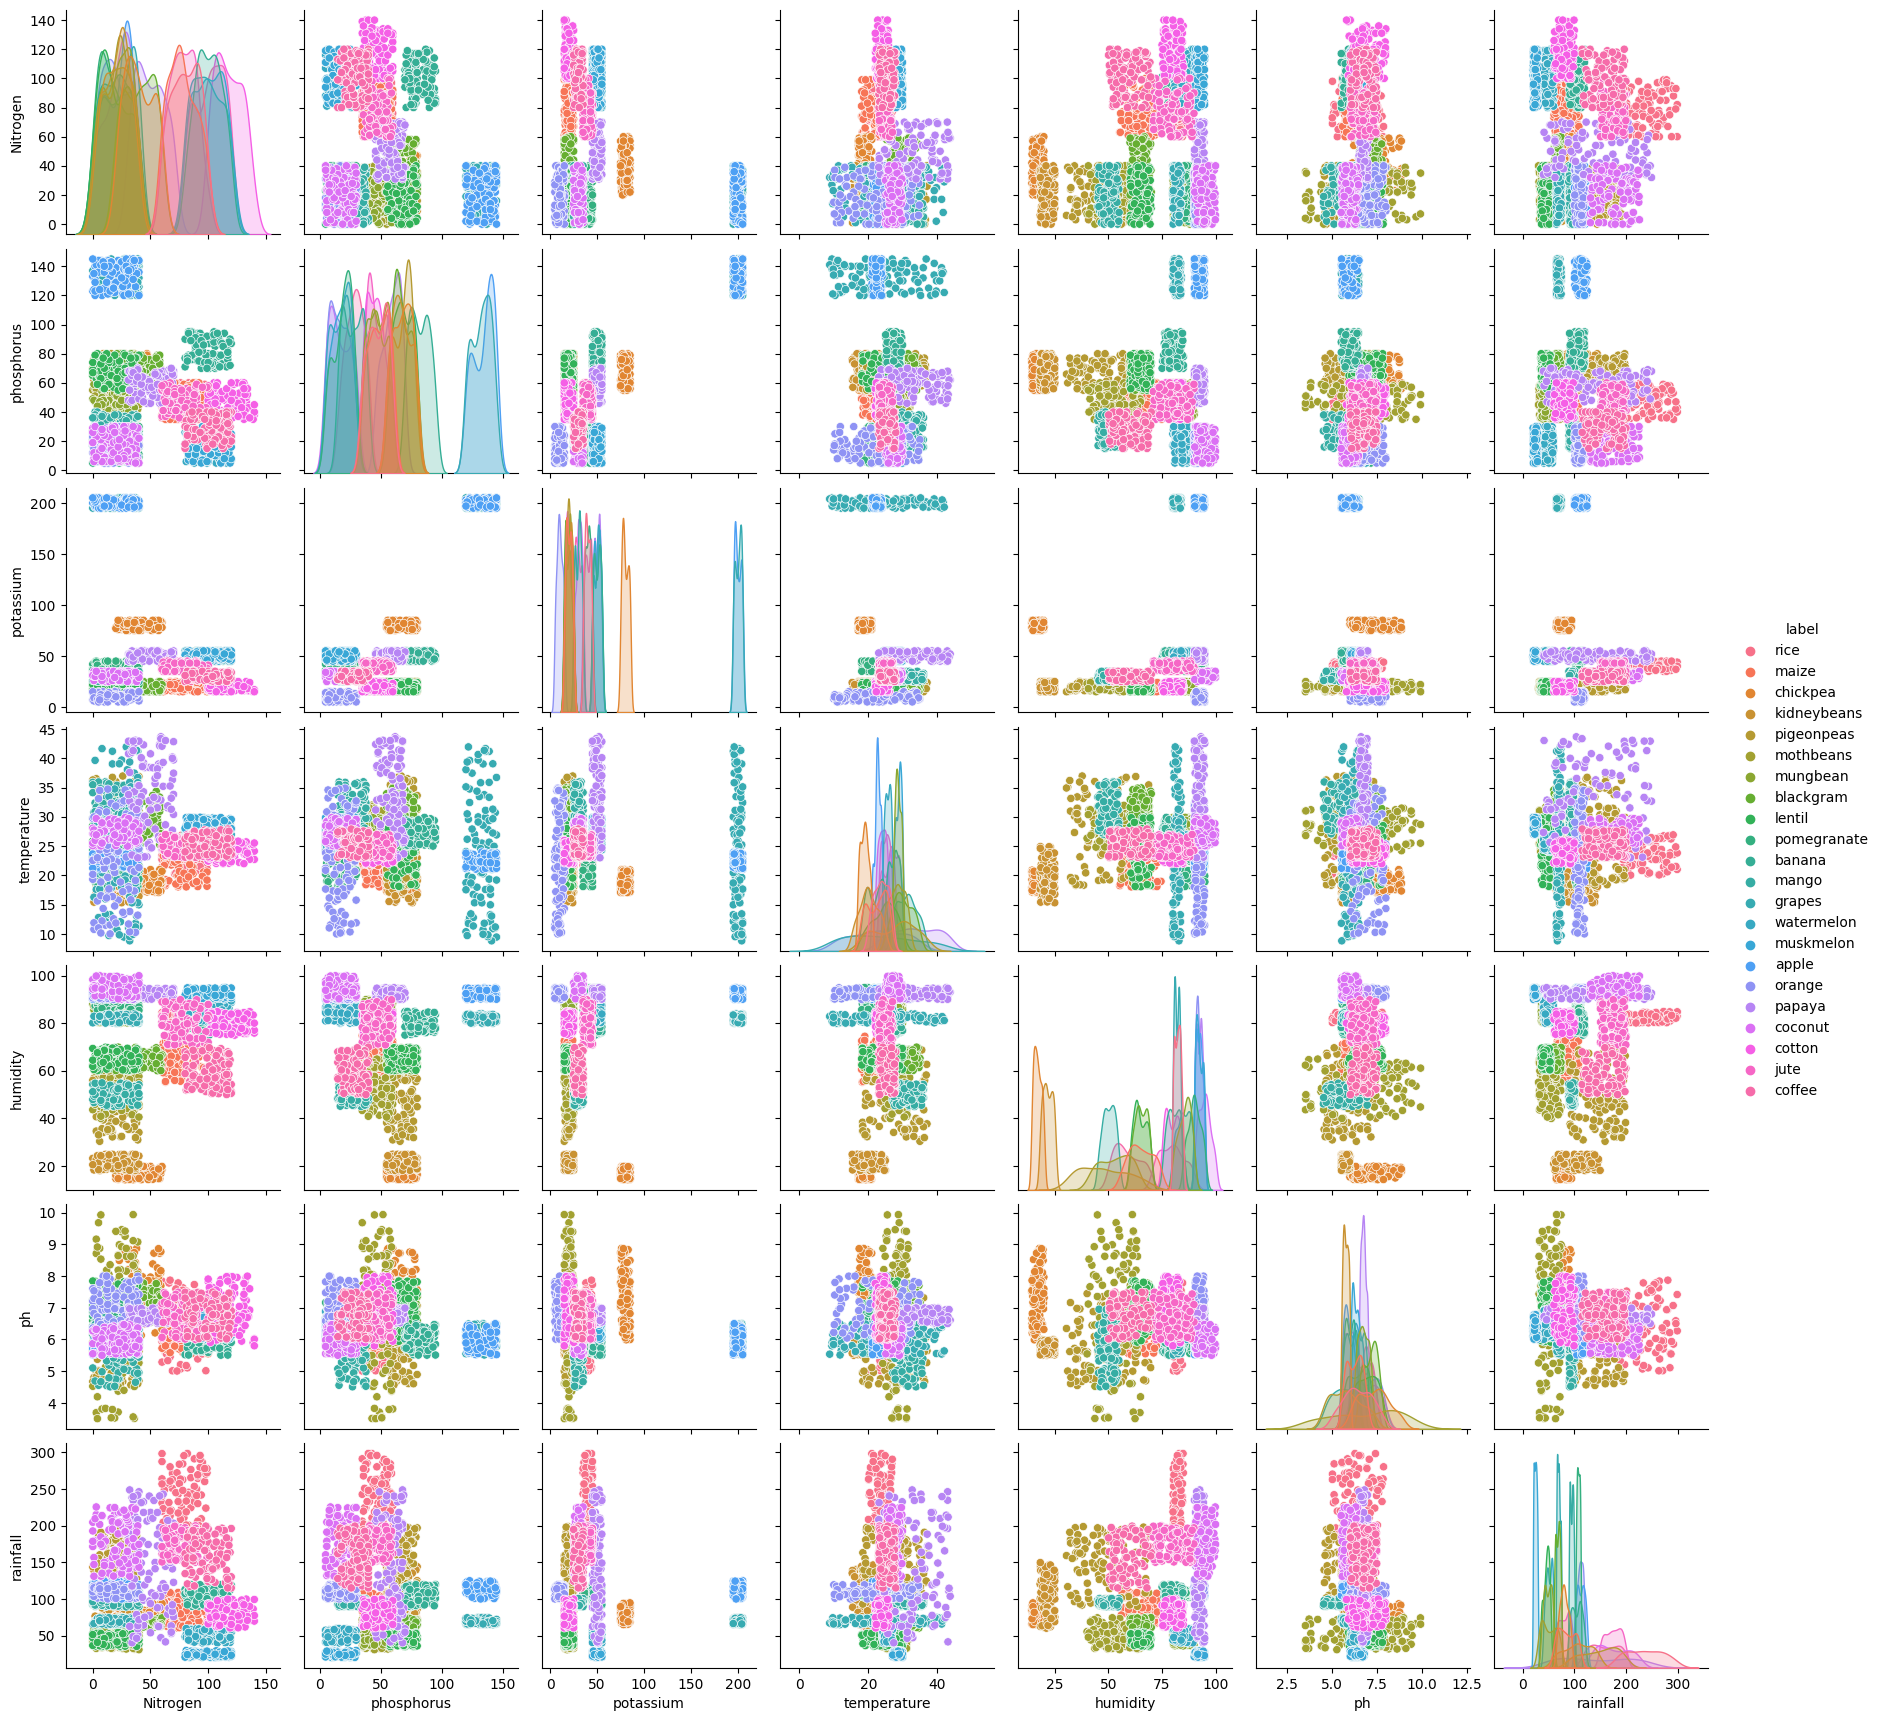

In [12]:
plt.figure(figsize=(15,6))
sns.pairplot(data, hue='label')
plt.show()

In [13]:
data_grouped = data.groupby('label',as_index=False).mean()
display(data_grouped)

,label,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


In [14]:
from  sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_scaled = data.copy()
data.drop(columns='label', axis=1, inplace=True)
for column in data.columns:
    data_scaled[column] = scaler.fit_transform(data[[column]])

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231


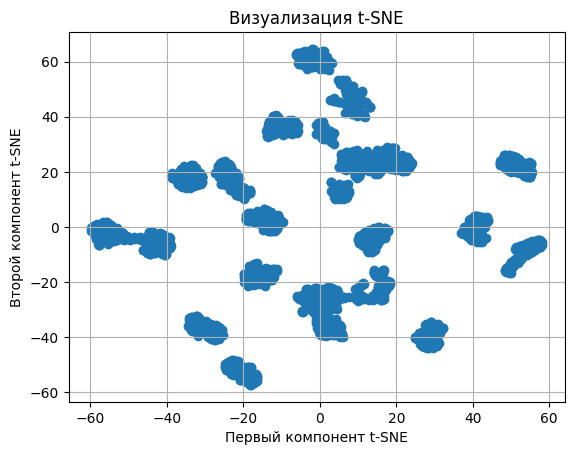

In [15]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.xlabel('Первый компонент t-SNE')
plt.ylabel('Второй компонент t-SNE')
plt.title('Визуализация t-SNE')
plt.grid(True)
plt.show()

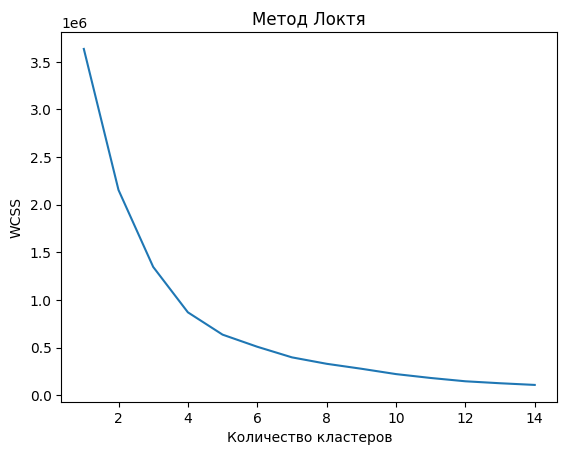

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_tsne)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia)
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.title('Метод Локтя')
plt.show()

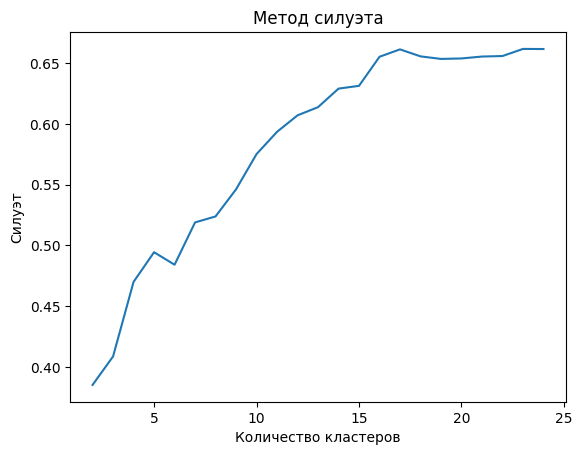

In [21]:
silhouette_scores = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_tsne)
    silhouette_scores.append(silhouette_score(data_tsne, kmeans.labels_))

plt.plot(range(2, 25), silhouette_scores)
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')
plt.title('Метод силуэта')
plt.show()

Silhouette Score for 6-clusters: 0.48411322
Silhouette Score for 15-clusters: 0.6314703
Silhouette Score for 16-clusters: 0.6554148
Silhouette Score for 17-clusters: 0.6615007
Silhouette Score for 22-clusters: 0.6560142
Silhouette Score for 23-clusters: 0.6618708


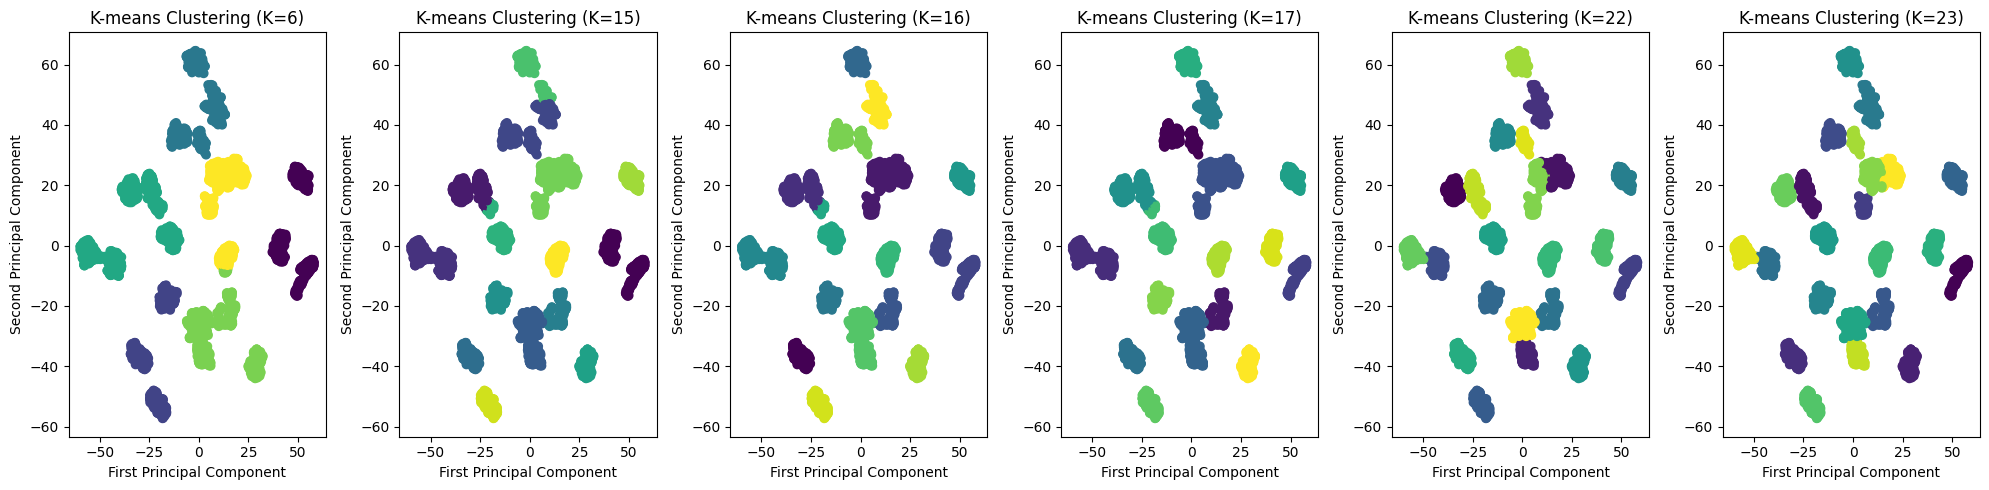

In [47]:
fig, axs = plt.subplots(1, 6, figsize=(20, 5))

list_clusters = [6, 15, 16, 17, 22, 23]

for i, n_clusters in enumerate(list_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_tsne)
    axs[i].scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans.labels_, cmap="viridis")
    axs[i].set_xlabel("First Principal Component")
    axs[i].set_ylabel("Second Principal Component")
    axs[i].set_title(f"K-means Clustering (K={n_clusters})")
    silhouette_kmeans = silhouette_score(data_tsne, kmeans.labels_)
    print(f"Silhouette Score for {n_clusters}-clusters:", silhouette_kmeans)

plt.tight_layout()
plt.show()

In [62]:
n_clusters = 22
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_tsne)

data['cluster'] = kmeans.labels_
cluster_means = data.groupby('cluster')['temperature'].mean()

In [63]:
features = ['phosphorus', 'temperature','Nitrogen','potassium','humidity','ph','rainfall']

cluster_means = data.groupby('cluster')[features].mean()
cluster_means

,phosphorus,temperature,Nitrogen,potassium,humidity,ph,rainfall
cluster,,,,,,,
0,18.750000,21.837842,18.870000,40.210000,90.125504,6.429172,107.528442
1,67.496063,29.316166,38.070866,19.322835,64.875491,7.132046,63.137994
2,48.243243,23.649983,78.675676,40.054054,82.419958,6.370866,250.715877
3,67.663265,27.925866,20.959184,20.306122,48.328877,5.782356,149.972066
4,132.530000,23.849575,23.180000,200.110000,81.875228,6.025937,69.611829
5,48.608247,22.351866,77.113402,19.824742,64.841933,6.244117,85.011670
6,17.720000,28.663066,100.320000,50.080000,92.342802,6.358805,24.689952
7,28.656566,25.522571,101.262626,29.888889,58.773346,6.794773,157.719199
8,59.140000,33.728947,49.880000,49.910000,92.363132,6.744101,142.307865


In [64]:
data_grouped = data.groupby('label', as_index=False).mean()
data_grouped_clean = data_grouped.drop(columns=['Unnamed: 8', 'Unnamed: 9'], axis=1)
display(data_grouped_clean.sort_values(by='cluster'))

,label,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,cluster
19,pomegranate,18.87,18.75,40.21,21.837842,90.125504,6.429172,107.528442,0.00
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151,1.16
18,pigeonpeas,20.73,67.73,20.29,27.741762,48.061633,5.794175,149.457564,3.30
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829,4.00
11,maize,77.76,48.44,19.79,22.389204,65.092249,6.245190,84.766988,5.33
15,muskmelon,100.32,17.72,50.08,28.663066,92.342802,6.358805,24.689952,6.00
20,rice,79.89,47.58,39.87,23.689332,82.272822,6.425471,236.181114,6.94
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295,7.14
17,papaya,49.88,59.05,50.04,33.723859,92.403388,6.741442,142.627839,8.13
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977,9.00


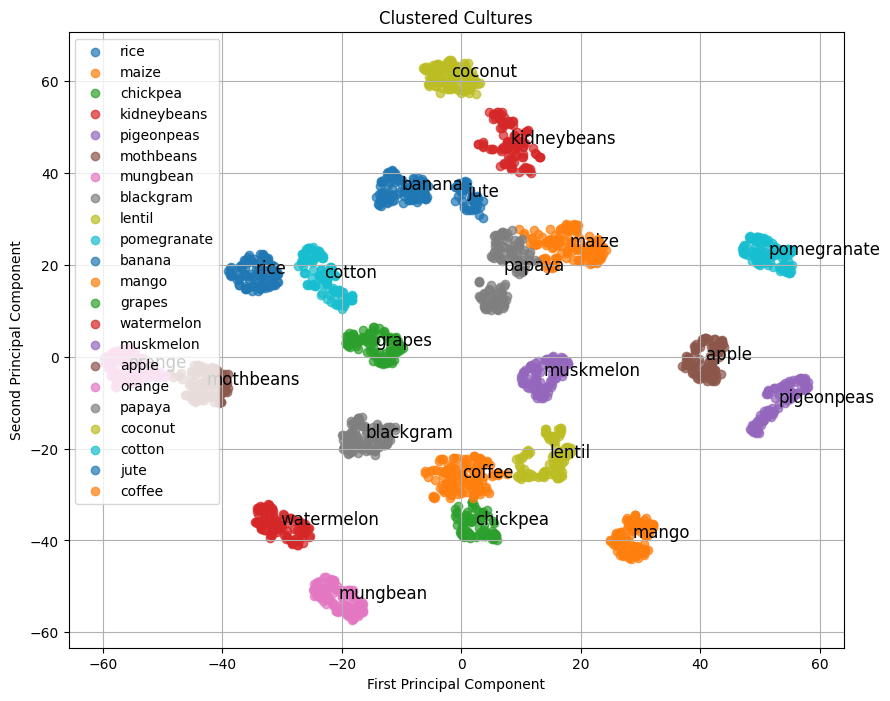

In [65]:
import matplotlib.pyplot as plt

labels = kmeans.labels_ 
cultures = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'] 


unique_labels = np.unique(labels)
cluster_cultures = dict(zip(unique_labels, cultures))

plt.figure(figsize=(10, 8))
for label in unique_labels:
    cluster_data = data_tsne[labels == label]
    cluster_center = cluster_data.mean(axis=0)
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_cultures[label], alpha=0.7)
    plt.text(cluster_center[0], cluster_center[1], cluster_cultures[label], fontsize=12)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Clustered Cultures")
plt.legend()
plt.grid(True)
plt.show()


# Таким образом, получились в кластерах средние значения, схожие со значениями из данных. Следовательно, зная средние значения характеристик почвы, можно рекомендовать высаживать садовникам ту или иную культуру. А сопоставив названия культур с получившимися кластерами, становится понятно, какие культуры схожи и какие культуры в какой кластер попали.